# Analysis Muons' Snapshots
In this notebook, we analyse the snapshot created from muons' simulations.
In particular, the snapshots have been created over a time window of `100ns` and `Dt=4ns`.

In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
dirin = os.path.join("..", "..", "Data", "MuonsROI")
filename = "Muons2e6_Snapshots_T100_DT4_Margin40_Grp1_Seed123456789_Part1.csv"
df = pd.read_csv(os.path.join(dirin, filename), comment='#', index_col=False)

In [3]:
groupby_event_df = df.groupby("eventnumber").sum()
groupby_event_df = groupby_event_df[groupby_event_df.pedetected>0]

In [4]:
groupby_event_df.pedetected.describe()

count    1.608700e+04
mean     7.397528e+03
std      3.673943e+04
min      1.000000e+00
25%      2.200000e+01
50%      1.266000e+03
75%      7.201000e+03
max      2.221782e+06
Name: pedetected, dtype: float64

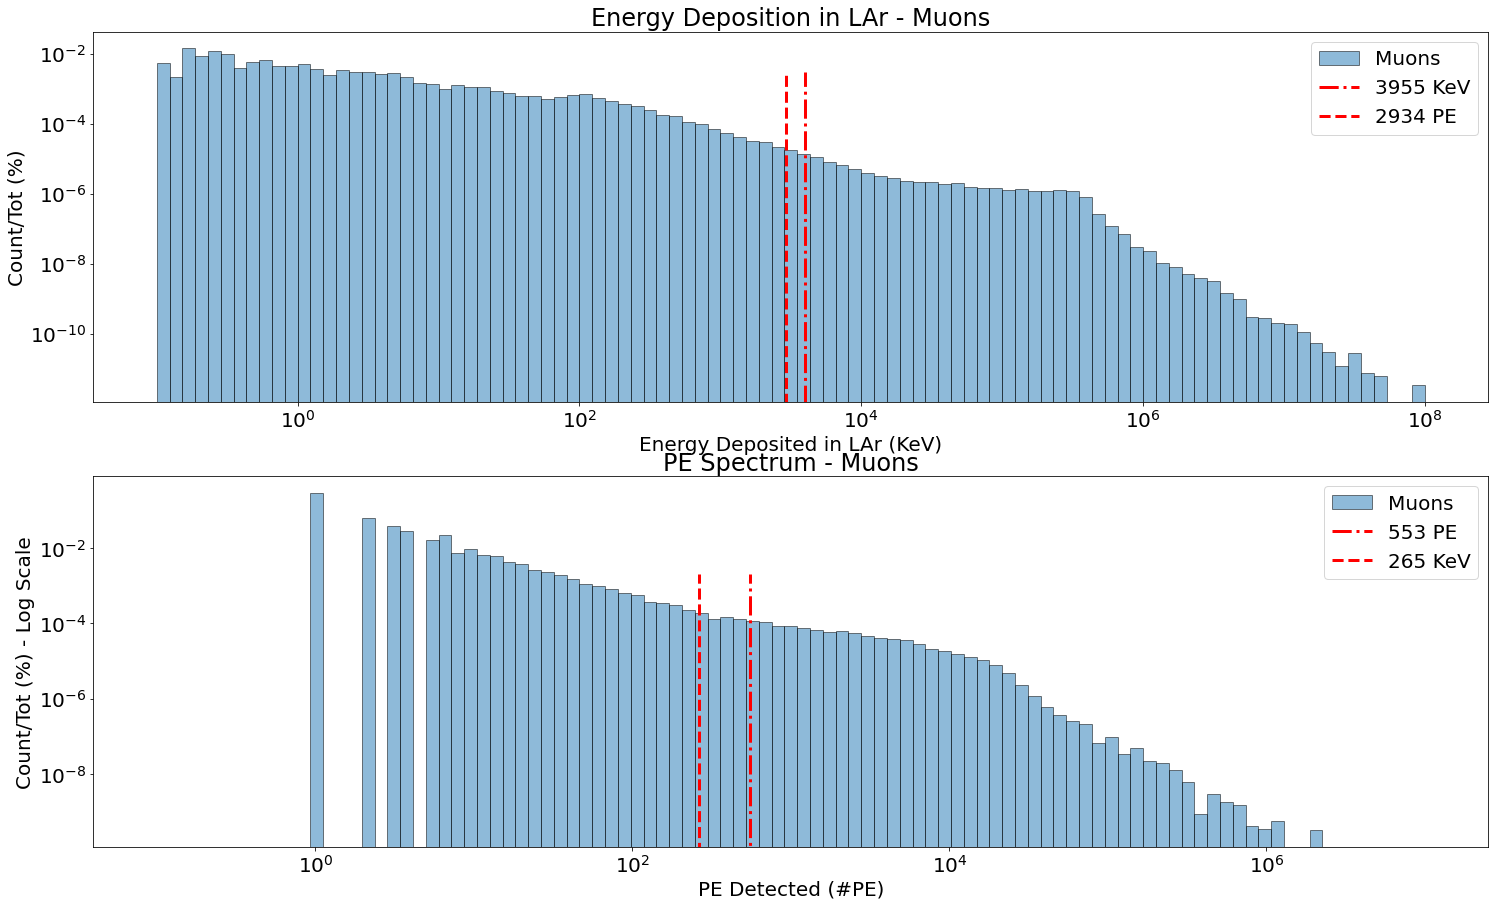

In [5]:
alpha=0.5
ar39_max_energy = 565
best_eff = 0.0035

plt.subplot(2,1,1)
plt.title("Energy Deposition in LAr - Muons")
bins = np.logspace(-1, 8, 100)
plt.hist(groupby_event_df.energydeposition, bins=bins, label="Muons", density=True, edgecolor='k', alpha=alpha)
plt.vlines(x=7 * ar39_max_energy, ymin=0, ymax=0.003, color='r', linestyles='dashdot', linewidth=3, label="{} KeV".format(7*ar39_max_energy))
plt.vlines(x=2934, ymin=0, ymax=0.003, color='r', linestyles='dashed', linewidth=3, label="{} PE".format(2934))
plt.xlabel("Energy Deposited in LAr (KeV)")
plt.ylabel("Count/Tot (%)")
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.subplot(2,1,2)
bins = np.logspace(-1, 7, 100)
plt.hist(groupby_event_df.pedetected, bins=bins, label="Muons", density=True, edgecolor='k', alpha=alpha)
plt.vlines(x=int(7*ar39_max_energy*40*best_eff), ymin=0, ymax=0.002, color='r', linestyles='dashdot', linewidth=3, label="{} PE".format(int(7*ar39_max_energy*40*best_eff)))
plt.vlines(x=265, ymin=0, ymax=0.002, color='r', linestyles='dashed', linewidth=3, label="{} KeV".format(265))
plt.title("PE Spectrum - Muons")
plt.xlabel("PE Detected (#PE)")
plt.ylabel("Count/Tot (%) - Log Scale")
plt.yscale('log')
plt.legend()
plt.xscale('log')
plt.show()

In [6]:
n_muon_events = len(groupby_event_df.index.unique())
ideal_marginals_events = groupby_event_df[groupby_event_df.pedetected < 553].index.unique()
marginals_events = groupby_event_df[groupby_event_df.pedetected <= 265].index.unique()
print("[Info] Ideal Marginal muons: {}/{} => {:.2f} %".format(len(ideal_marginals_events), n_muon_events, len(ideal_marginals_events)/n_muon_events*100))
print("[Info] Simulated Marginal muons: {}/{} => {:.2f} %".format(len(marginals_events), n_muon_events, len(marginals_events)/n_muon_events*100))

[Info] Ideal Marginal muons: 6999/16087 => 43.51 %
[Info] Simulated Marginal muons: 6352/16087 => 39.49 %


In [7]:
marginal_df = df[df.eventnumber.isin(marginals_events)]
groupby_event_marginaldf = marginal_df.groupby("eventnumber").sum()

In [8]:
std_event_marginals = groupby_event_marginaldf.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_all = groupby_event_df.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)

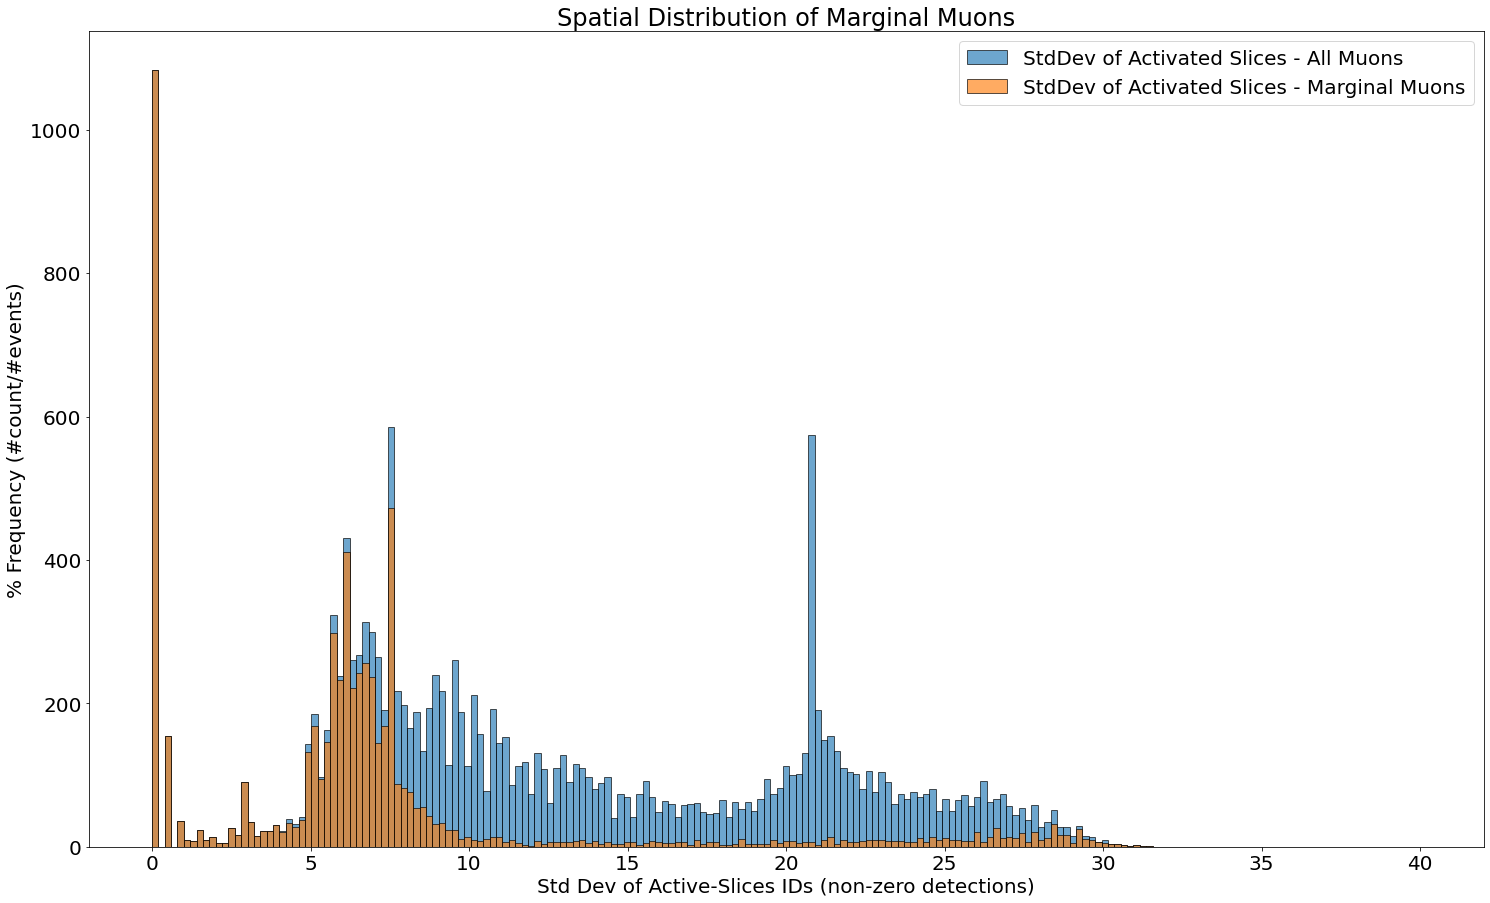

In [9]:
alpha=0.65
bins = np.linspace(0, 40, 200)
plt.title("Spatial Distribution of Marginal Muons")
plt.xlabel("Std Dev of Active-Slices IDs (non-zero detections)")
plt.ylabel("% Frequency (#count/#events)")
plt.hist(std_event_all, bins=bins, label="StdDev of Activated Slices - All Muons", density=False, edgecolor='k', alpha=alpha)
plt.hist(std_event_marginals, bins=bins, label="StdDev of Activated Slices - Marginal Muons", density=False, edgecolor='k', alpha=alpha)
#plt.text(15, 650, "Marginal Muons (<265 PE) are {} events.\n" \
#                  "Marginals have low std deviation (localized deposit).\n" \
#                  "General muons deposit larger amount of energy in a larger area,\nresulting in high std deviation.".format(len(marginals_events)))
plt.legend()
plt.show()

In [10]:
groupby_event_marginaldf[groupby_event_marginaldf.index.isin(std_event_marginals[std_event_marginals<5].index)].energydeposition.describe()

count     1849.000000
mean       599.272803
std       2318.826868
min          0.000006
25%          7.741700
50%         42.922300
75%        190.623000
max      30504.800000
Name: energydeposition, dtype: float64

In [11]:
dirin = os.path.join("..", "..", "Development", "Out")
prefix_7Ar39_files = "Ar39_Snapshots_T100_DT4_Grp7_Seed123456789_Part1.csv"
df7 = pd.read_csv(os.path.join(dirin, prefix_7Ar39_files), index_col=False, comment='#')
print("[Info] 7 Ar39: {} events".format(df7.eventnumber.nunique()))

[Info] 7 Ar39: 98852 events


In [12]:
groupby_event_df7 = df7.groupby("eventnumber").sum()
std_event_df7 = groupby_event_df7.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)

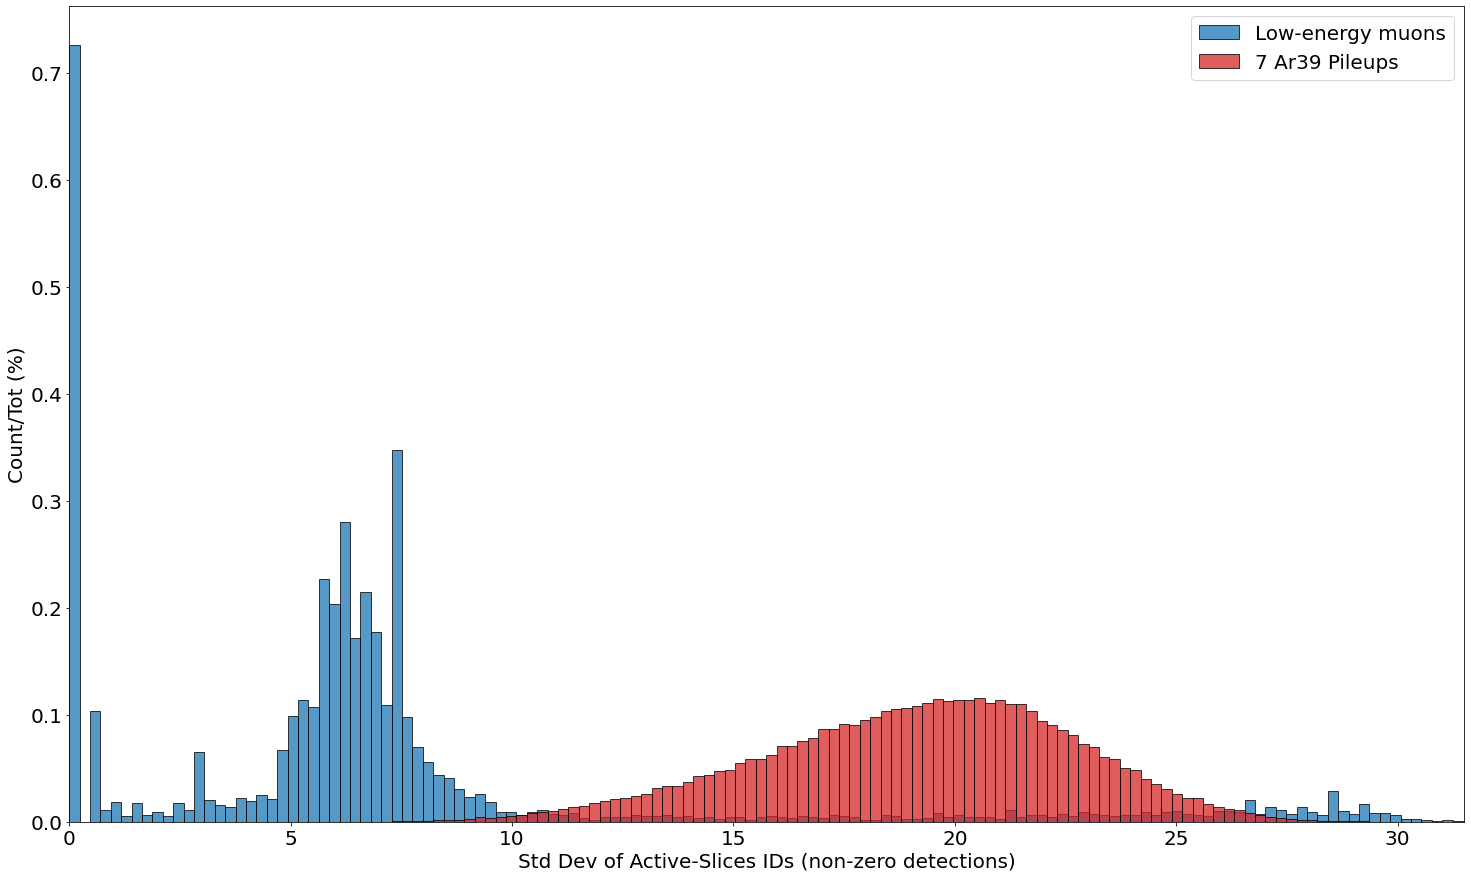

In [16]:
alpha=0.75
bins = np.linspace(0, 35, 150)
#plt.title("Spatial Distribution of Marginal Muons")
plt.xlabel("Std Dev of Active-Slices IDs (non-zero detections)")
plt.ylabel("Count/Tot (%)")
plt.hist(std_event_marginals, bins=bins, label="Low-energy muons", density=True, edgecolor='k', alpha=alpha)
plt.hist(std_event_df7, bins=bins, label="7 Ar39 Pileups", density=True, edgecolor='k', alpha=alpha, color='#d62728')
plt.legend()
plt.xlim(0,std_event_marginals.max())
plt.show()

6352